# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Download Dataset**

In [202]:
data_path = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/refs/heads/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(data_path)

further infos: https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

penjelasan dataset

# **Assesing Data**

Check data summary

In [5]:
# shape dari data
df.shape

(7043, 21)

In [6]:
# 5 baris pertama data
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# menghitung missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# deskripsi statistik data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(f'banyaknya data yang terduplikasi: {df.duplicated().sum()}')

banyaknya data yang terduplikasi: 0


Ada kemungkinan salah penulisan atau double writting dengan makna yang sama, seperti: yes, Yess, Yes, sehingga perlu memastikan unique values yang ada.

In [11]:
# cek incorrect values
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts(dropna=False))
    print("-" * 20)

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
--------------------
gender
Male      3555
Female    3488
Name: count, dtype: int64
--------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
--------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
--------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
--------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
--------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
--------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
--------------------
OnlineBackup
No   

## **Insights**:

#### **1. Data Types & Non-null Counts:**
* Dataset berisi **7043** baris dan **21** kolom.
* **Data types**: Terdapat 18 kolom dengan tipe data `object`, 2 kolom dengan tipe data `int64`, dan 1 kolom dengan tipe data `float64`.
     * **Numerical Features**: Features yang termasuk adalah `SeniorCitizen`, `tenure` dan `MonthlyCharges`.
     * **Categorical Features**: Features yang termasuk adalah `Partner`, `gender`, etc.

#### **2. Summary Statistics:**
* **Categorical Data**: 
     * `customerID` memiliki unique values terbanyak.
     * Untuk kolom-kolom lain memiliki data unique minimal 2 dan maksimalnya 4.
     * `TotalCharges` tipe datanya harus diubah sehingga summary statistics-nya bisa terbaca.
* **Numerical Data**: 
     * `tenure` memiliki rata-rata sebesar `32.37` atau setara 32 bulan dari range berlangganan `0` hingga `72` bulan. Hal ini menunjukkan sebagian besar pelanggan berhenti di pertengahan bulan dan ini bisa menjadi indikator adanya ketidakpuasan terhadap layanan yang diberikan. 
     * `MonthlyCharges` memiliki rata-rata sebesar `$64.76` dengan standar deviasi sebesar `$30.09`, mengindikasikan variasi harga pembayaran bulanan antar pelanggan yang beragam. Rentang transaksi bulanan minimal `$18.25` dan maksimal `$118.75`, menunjukkan perbedaan yang sangat signifikan dalam transaksi dan terdapat potensi untuk memaksimalkan penggunaan layanan yang disediakan oleh perusahaan kepada pelanggan.
     

#### **3. Missing Values Summary:**
* Untuk saat ini tidak terdapat kolom yang berisi missing values.

#### **4. Duplicate & Unique Values Summary:**
* Dari `df.duplicated()`, unique values, dan `df.head()` tidak terlihat ada data yang terduplikasi.
* `customerID` tidak diperlukan untuk proses modeling.
* `TotalCharges` tidak tepat menggunakan tipe data object.
* Tidak ada unique values yang berasal dari salah penulisan atau double writting.

#### **Masalah yang Bisa Diselesaikan:**
* Penulisan nama kolom tidak konsisten, seperti: lower case, diawali huruf kecil/kapital, dan camel case.
* Penulisan kapitalisasi data dalam setiap baris tidak konsisten dan nama kolom juga, sehingga bisa diubah menjadi lower case semua.
* Kolom `SeniorCitizen` berisi data kategorikal apakah seseorang merupakan warga lanjut usia atau tidak dan bukan data untuk perhitungan matematis meskipun bentuk datanya 0 dan 1, jadi tipe datanya bisa diubah dari `int64` menjadi `category`.
* Kolom `TotalCharges` berisi data numerik kontinu sehingga data type-nya perlu diubah, dari `object` menjadi `float64`.
* Perlu dilakukan categorical encoding untuk data-data kategorik.
* Melakukan feature selection daripada menggunakan semua kolom yang ada, seperti men-drop kolom `customerID`.

# **Data Cleaning**

#### Column Renaming & Data Consistency

Penamaan kolom tidak konsisten sehingga perlu diubah agar konsisten dan sesuai standar.

In [203]:
df.columns = df.columns.str.lower()

Data dalam setiap baris memiliki format penulisan yang tidak konsisten sehingga perlu diubah juga.

In [204]:
categorical_columns = list(df.columns[df.dtypes == 'object'])

In [205]:
for col in categorical_columns:
     df[col] = df[col].str.lower()

#### Correcting Data Type 

Mengubah tipe data yang tidak sesuai dalam setiap kolom dalam dataset.

In [206]:
df.seniorcitizen = df.seniorcitizen.astype('category')

**Insight**:
* Kolom `seniorcitizen` meskipun datanya berupa angka atau numerik yaitu 0 dan 1, tetapi kolom ini berisi data kategorik nomina yang menjelaskan apakah seorang pelanggan lansia atau tidak sehingga datanya diubah dari `int64` menjadi `category`.

In [207]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

**Insights:**
* mengubah tipe data object menjadi numerik yang sesuai, dalam konteks kolom ini maka tipe data berubah dari `object` menjadi `float64`.
* `errors='coerce'` membuat nilai yang tidak valid atau tidak dapat diubah ke tipe data numerik akan otomatis digantikan dengan `NaN`.
* Sebelumnya missing values ada 0, sebagai akibat menggunakan parameter `errors='coerce'` maka saat ini akan ada kemungkinan adanya missing values di kolom `totalcharges`.

#### Handling Missing Values

menangani missing values

In [208]:
df.isna().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [209]:
df[df.totalcharges.isna()].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
customerid,4472-lvygi,3115-czmzd,5709-lvoeq,4367-nuyao,1371-dwpaz,7644-omvmy,3213-vvolg,2520-sgtta,2923-arzlg,4075-wkniu,2775-sefee
gender,female,male,female,male,female,male,male,female,male,female,male
seniorcitizen,0,0,0,0,0,0,0,0,0,0,0
partner,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,no
dependents,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
tenure,0,0,0,0,0,0,0,0,0,0,0
phoneservice,no,yes,yes,yes,no,yes,yes,yes,yes,yes,yes
multiplelines,no phone service,no,no,yes,no phone service,no,yes,no,no,yes,yes
internetservice,dsl,no,dsl,no,dsl,no,no,no,no,dsl,dsl
onlinesecurity,yes,no internet service,yes,no internet service,yes,no internet service,no internet service,no internet service,no internet service,no,yes


In [135]:
missing_ratio = (df['totalcharges'].isna().sum() / len(df)) * 100
print(f"Missing ratio: {missing_ratio:.2f}%")

Missing ratio: 0.16%


**Insights**:
* Terdapat missing values di kolom `totalcharges` sebanyak 11.
* Terlihat data yang memiliki missing values bernilai `no` di kolom `churn` yang artinya pelanggan tidak memiliki kecenderungan atau karakteristik untuk berhenti.
* Meskipun pelanggan tidak churn, untuk menentukan langkah selanjutnya (di-drop atau dipertahankan), perlu memperhatikan beberapa hal:
     * Kolom `monthlycharges` sudah berisi harga tagihan bulanan.
     * Namun, semua kolom `tenure` berisi angka `0`, hal ini mengindikasikan bahwa 11 orang ini adalah pelanggan baru.
     * Data dari pelanggan baru tidak memiliki kontribusi yang signifikan dalam model dan belum memiliki pola historis yang cukup atau diperlukan. Selain itu, pelanggan baru saat pertama kali berlangganan atau bulan ke-0 mungkin belum mengalami masalah yang sering kali menjadi pemicu churn (seperti masalah dengan layanan atau pengalaman pelanggan negatif).
     
* Proporsi missing values ini sangat kecil dibandingkan total data (11 dari 7043), yaitu sekitar 0.16%

**Conclusion**: 11 data ini bisa di-drop karena tidak berkontribusi signifikan untuk model.

In [210]:
# drop missing values
df = df.dropna(subset=['totalcharges'])

drop kolom yang tidak digunakan untuk kepentingan eda agar tidak mengganggu proses visualisasi data

In [211]:
df = df.drop(columns='customerid')

# **Exploratory Data Analysis**

menggunakan data yang merupakan hasil copy untuk di-transform sehingga data asli tetap terjaga keoriginalannya

In [212]:
eda_df = df.copy()

#### **Univariate Analysis**:

Univariate analysis dengan data kategorik:

In [23]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [213]:
categorical_columns = eda_df.select_dtypes(include=['object', 'category']).columns

In [214]:
def analyze_categorical(df: pd.DataFrame, categorical_columns):
    """Plots the distribution of categorical features in a grid layout."""

    n_features = len(categorical_columns)
    n_rows = (n_features + 6 - 1) // 6  
    fig, axes = plt.subplots(n_rows, 6, figsize=(20, 5 * n_rows), constrained_layout=True)  
    
    axes = axes.flatten()
    for i, feature in enumerate(categorical_columns):
        ax = axes[i]  
        sns.countplot(
            x=feature,
            data=df,
            palette="crest",
            order=df[feature].value_counts().index,
            ax=ax
        )
        ax.set_title(f"Distribution of {feature}")
        ax.set_xlabel("")
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=45)
    
    # kosongkan axes yang tidak terpakai
    for i in range(n_features, len(axes)):
        fig.delaxes(axes[i])
    
    plt.show()

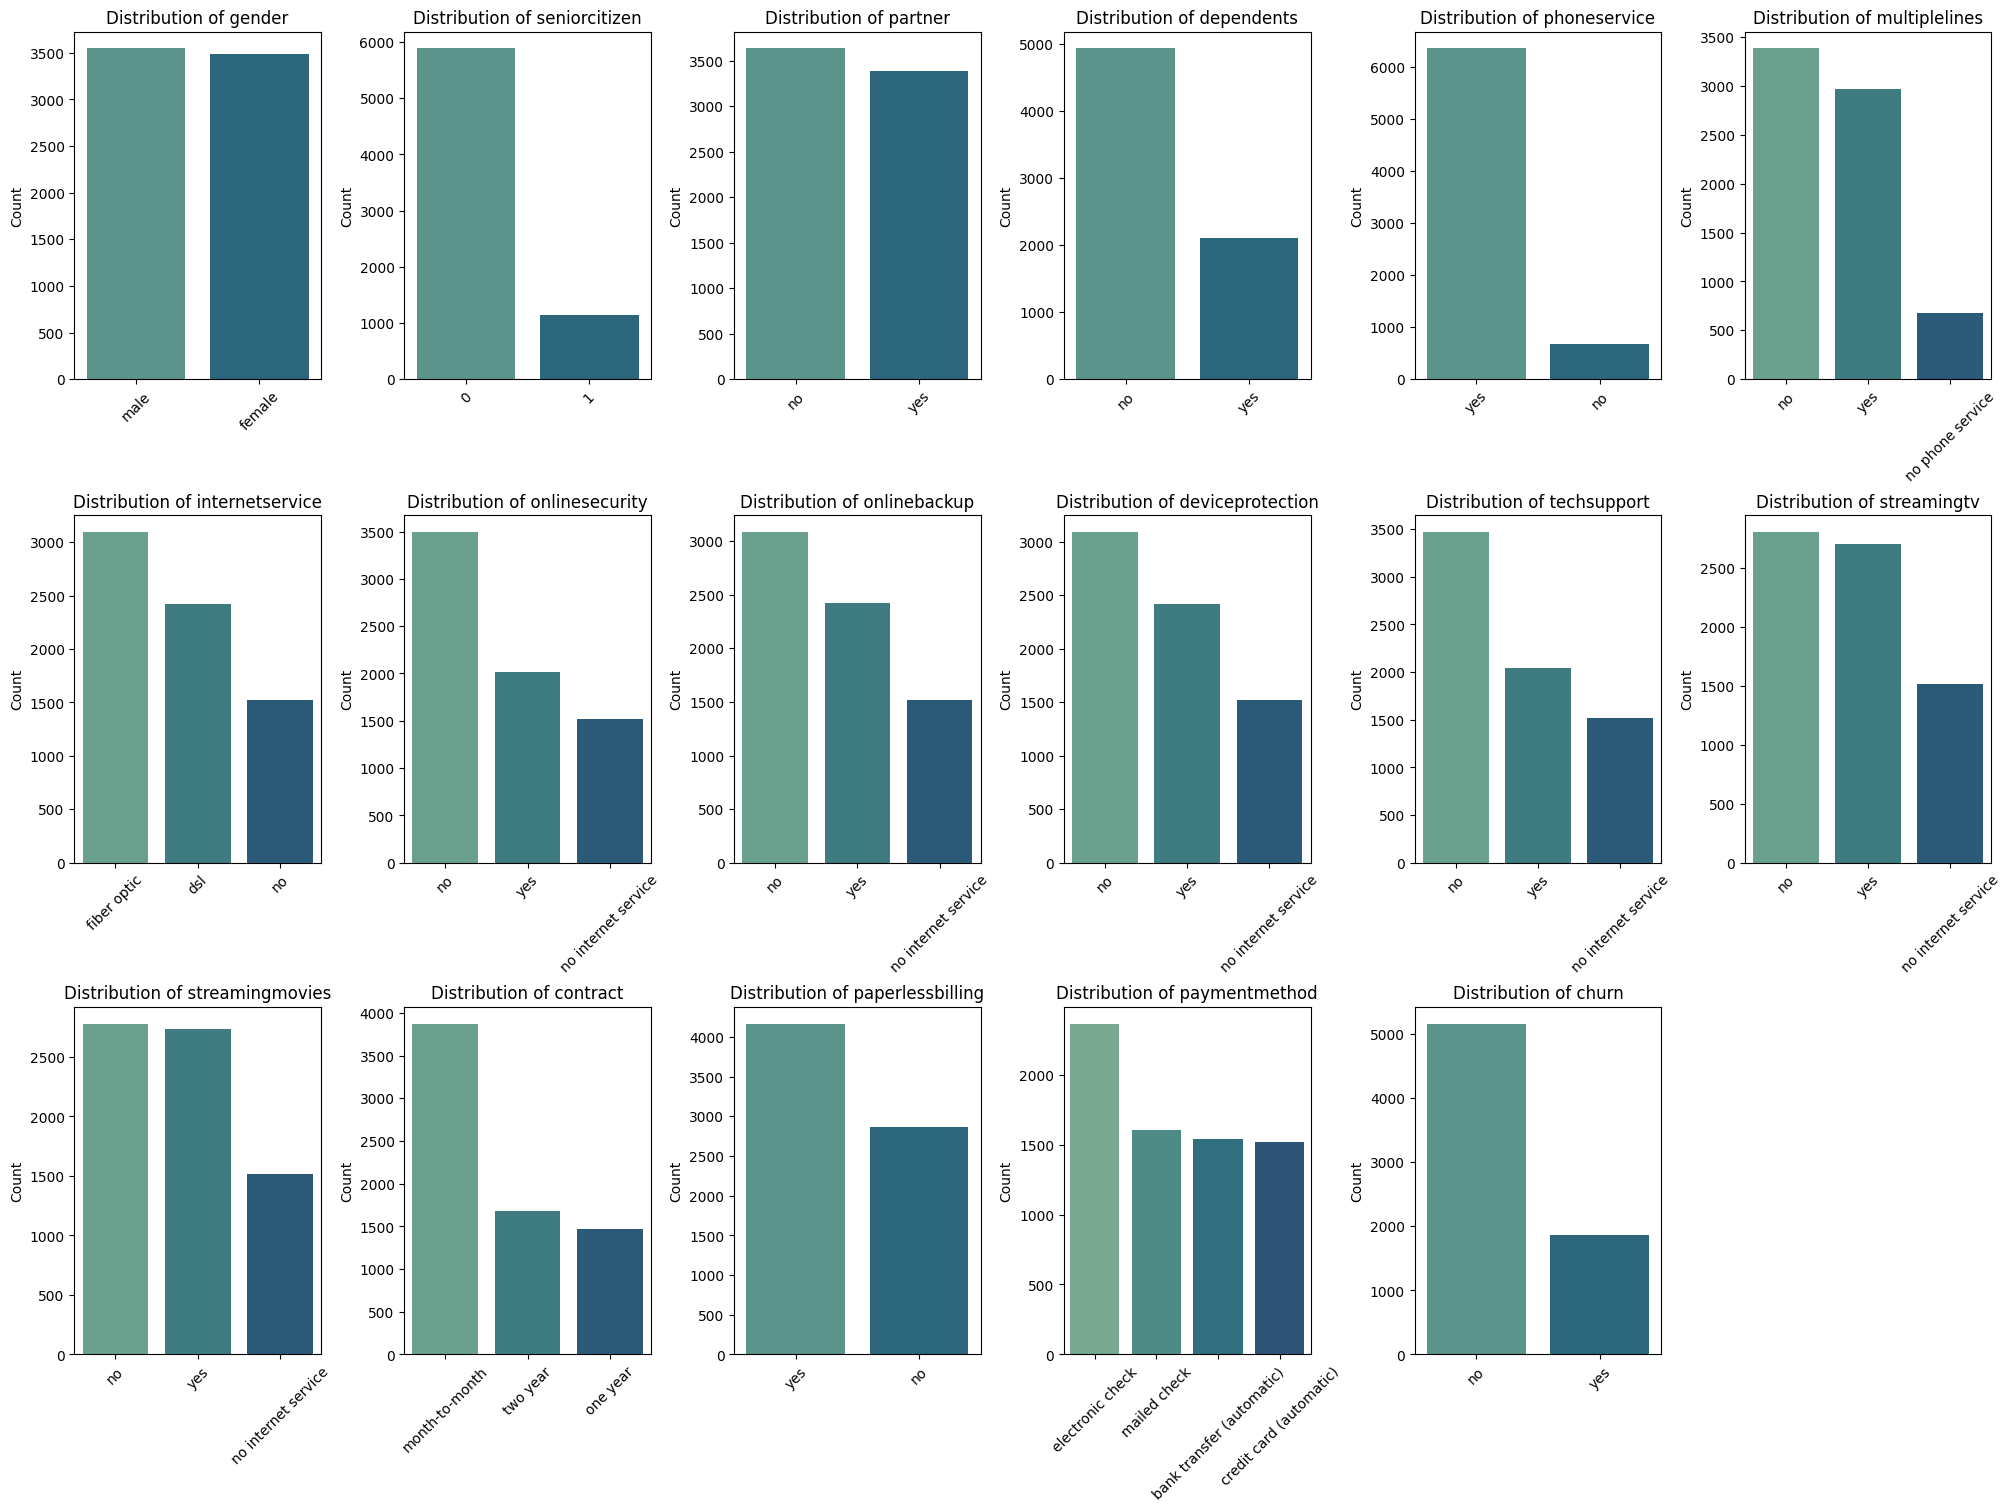

In [26]:
analyze_categorical(eda_df, categorical_columns)

**Insights**:

* **Personal informations**:
    * `gender` -> Tidak terdapat perbedaan yang signifikan antara female dengan male.
    * `seniorcitizen` -> Terdapat perbedaan yang signifikan, jumlah data yang bernilai 0 jauh lebih banyak yang artinya pelanggan didominasi oleh warga non-lansia.
    * `partner` -> Perbedaan tidak terlalu jauh, tetapi didominasi oleh pelanggan yang memiliki pasangan.
    * `dependents` -> Didominasi oleh pelanggan yang tidak memiliki tanggungan atau tinggal sendiri.

* **Services**:
    * `phoneservice` -> Terdapat perbedaan yang sangat signifikan dan didominasi oleh pelanggan berlangganan layanan telepon (mungkin berupa telepon rumah atau ponsel).
    * `multiplelines` -> Didominasi oleh pelanggan yang hanya memiliki satu saluran telepon, lalu diikuti oleh pelanggan yang berlangganan dengan lebih dari satu saluran telepon.
    * `internetservice` -> Terdapat perbedaan yang cukup jauh antara penggunaan fiber optic, DSL, dan tidak menggunakan sama sekali. Ini berarti banyak pelanggan yang menggunakan layanan fiber optic untuk layanan internetnya.
    * `onlinesecurity`, `onlinebackup`, `deviceprotection`, `techsupport`, `streamingtv`, `streamingmovies` -> Untuk layanan tambahan atau add-on pelanggan kebanyakan tidak memilih untuk berlangganan pada layanan ini, tetapi pada layanan `streamingtv` dan `streamingmovies` perbedaan cukup tipis yang menandakan jumlah pelanggan yang berlangganan maupun tidak perbedaannya tidak signifikan, tapi masih didominasi oleh pelanggan yang tidak berlangganan, lalu diikuti oleh pelanggan yang tidak memiliki layanan internet sama sekali.

* **System and payment**:
    * `contract` -> Banyak pelanggan yang memilih sistem kontrak month-to-month dibandingkan dua sistem kontrak lainnya, yaitu two year dan one year.
    * `paperlessbilling` -> Didominasi oleh pelanggan yang memilih penagihan tanpa kertas (paperless). Tagihan dikirim melalui email atau portal online, dan pembayaran biasanya dilakukan menggunakan metode elektronik.
    * `paymentmethod` -> Terdapat perbedaan yang signifikan antara electronic check dengan tiga metode pembayaran lainnya, yang menandakan bahwa pelanggan lebih memilih menggunakan electronic check.

* **Churn**:
    * `churn` -> Terdapat perbedaan yang sangat signifikan antara pelanggan yang akan churn dan tidak, dan data didominasi oleh pelanggan yang tidak churn.


Univariate analysis dengan data numerik:

In [215]:
numerical_columns = eda_df.select_dtypes(exclude=['object', 'category']).columns

In [216]:
def analyze_numerical(df: pd.DataFrame, features):
     """Plots the distribution of a numerical feature using a histogram and KDE."""
     
     n_cols = 3 
     n_rows = (3 + n_cols - 1) // n_cols  
     plt.figure(figsize=(15, 5 * n_rows)) 
    
     for i, feature in enumerate(features):
        plt.subplot(n_rows, n_cols, i + 1) 
        sns.histplot(df[feature], kde=True, bins=30)
        mean_val = df[feature].mean()
        plt.axvline(mean_val, color='r', linestyle='dashed', linewidth=1)
        plt.text(mean_val * 1.01, plt.ylim()[1] * 0.9, f'μ = {mean_val:.2f}', color='r')
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Count")
    
     plt.tight_layout()  
     plt.show()

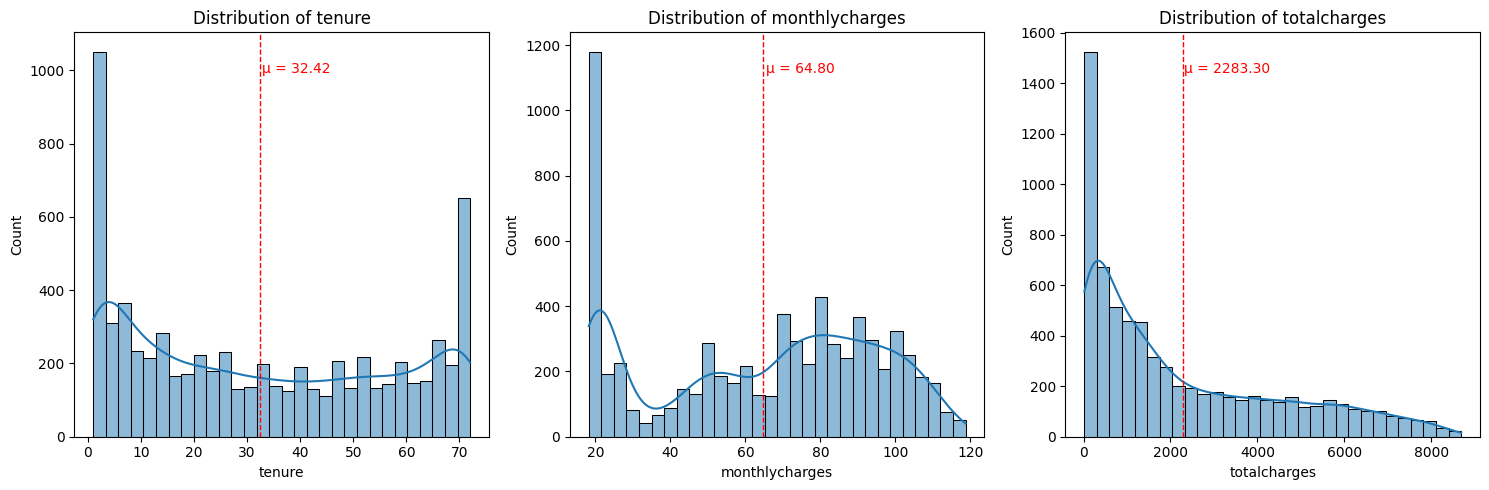

In [29]:
analyze_numerical(eda_df, numerical_columns)

**Insights**:
* Tidak ada kolom yang berdistribusi normal atau simetris.
* `tenure` distribusinya nyaris seperti distribusi U (U-shaped distribution) dan distribusinya terbagi menjadi 2 populasi dengan perilaku berbeda, seperti pola awal didominasi pelanggan baru dan pola akhir diisi oleh pelanggan yang loyal dan jarang ada nilai di tengah, mean-nya juga nyaris mendekati median.
* `monthlycharges` menunjukkan distribusi yang sangat bervariasi dan terlihat data terkonsentrasi di sekitar `$70` sampai `$90`.
* `totalcharges` terlihat seperti distribusi log-normal atau positively skewed (right-skewed) dimana mean > median dan mayoritas datanya terdapat di sekitar `$0 - $100`, semakin kecil di bagian kanan (tail) mengindikasikan harga yang semakin mahal dan hal ini logis karena semakin mahal harganya maka belum tentu semua orang sanggup.
* Nilai besar di ekor distribusi right-skewed tetap perlu diperhatikan karena bisa memengaruhi model.
* Transformasi data atau scaling bisa menjadi solusi untuk mengurangi dampak distribusi yang tidak seimbang.

In [30]:
eda_df.describe()

,tenure,monthlycharges,totalcharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


**Insights**:
* Data `totalcharges` memiliki rentang yang sangat besar yaitu dengan `min = 18.8` dan `max = 8684.8`, dengan kuartil 1 `(Q1) = 401.45`, `Q2 = 1397.475`, dan `Q3 = 3794.7375` menunjukkan selisih antar kuartil cukup besar. 
* Mengingat selisihnya yang besar dan Q3 cukup tinggi yaitu 3794.74, membuat kemungkinan bahwa nilai `max = 8684.8` bukanlah outlier karena batas deteksi outlier di atas `Q3 + 1.5 x IQR` bisa sangat jauh sehingga nilai disekitar max masih ada di dalam rentang.

In [217]:
def boxplot(numerical_columns: list):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
    for i, feature in enumerate(numerical_columns):
        sns.boxplot(data=eda_df, y=feature, ax=axes[i])
        axes[i].set_title(f"Boxplot of {feature}")
        axes[i].set_ylabel("Value") 
    plt.tight_layout()
    plt.show()

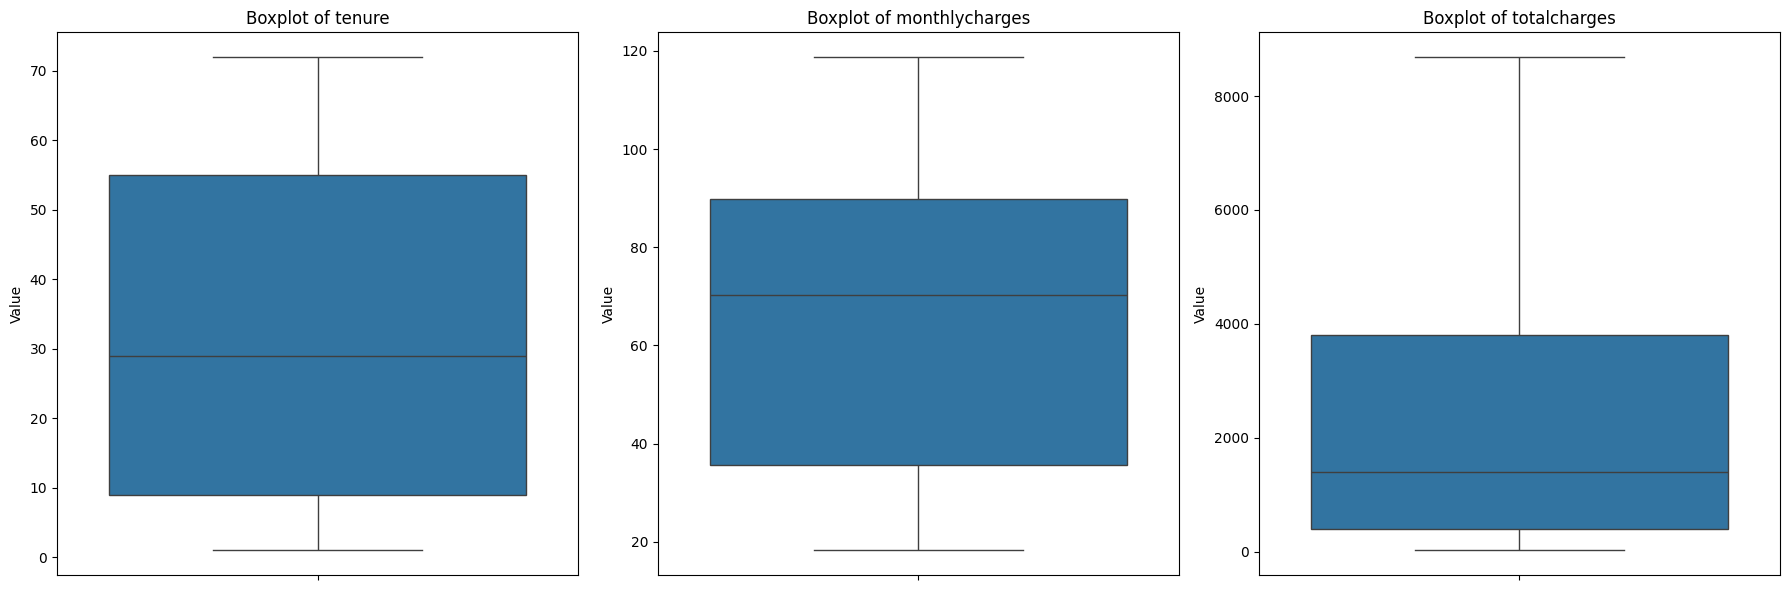

In [32]:
boxplot(numerical_columns)

**Insight**:
* Tidak ada outlier di semua data numerik sehingga tidak perlu menangani outlier.

#### **Bivariate Analysis**:

Analisis bivariat antara data kategorik dan kategorik menggunakan barchart.

In [218]:
def bivariate_analysis_barchart(df: pd.DataFrame, churn_col: str, categorical_columns):
    """Creates barcharts to analyze the relationship between features and churn."""
    
    if churn_col in categorical_columns:
        categorical_columns = [col for col in categorical_columns if col != churn_col]

    num_cols = 4
    num_rows = (len(categorical_columns) // num_cols) + (1 if len(categorical_columns) % num_cols != 0 else 0)  
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))
    axes = axes.flatten()

    
    for i, col in enumerate(categorical_columns):
        churn_distribution = df.groupby([churn_col, col]).size().reset_index(name='count')
        sns.barplot(data=churn_distribution, x=col, y='count', hue=churn_col, palette='coolwarm', ax=axes[i])
        axes[i].set_title(f'{col} vs {churn_col}', fontsize=14)
        axes[i].set_ylabel('Count')
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)

        # membuat legend
        handles, labels = axes[i].get_legend_handles_labels()
        axes[i].legend(handles=handles, labels=['Not Churn', 'Churn'], title='Churn', loc='upper right')

    # hapus subplots yang tidak digunakan 
    for j in range(len(categorical_columns), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

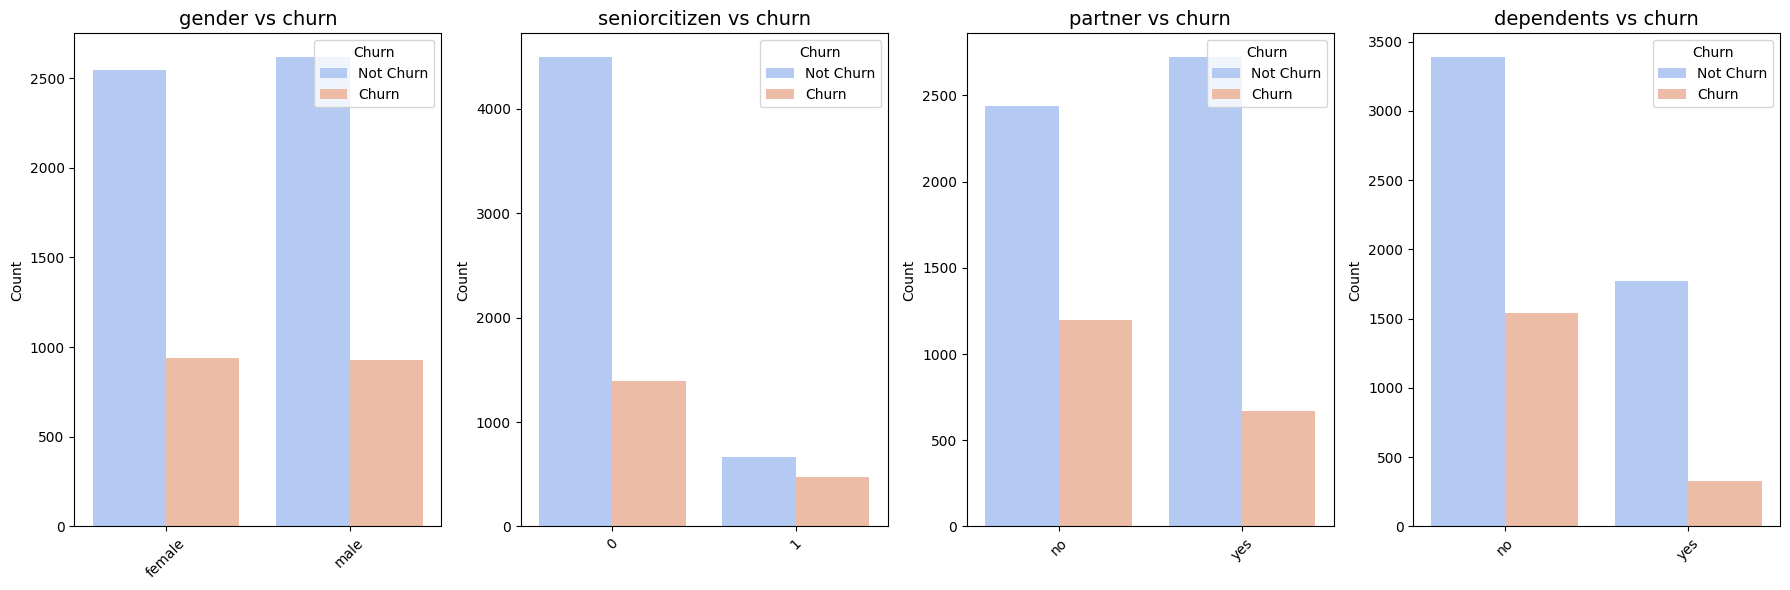

In [219]:
bivariate_analysis_barchart(eda_df, churn_col='churn', categorical_columns=categorical_columns[:4])

**Insights**:
* `gender` -> Pada gender female perbedaan pelanggan yang churn dan tidak churn sangat signifikan dan hal yang sama terjadi pada gender male juga. Namun, jika kedua gender dibandingkan outputnya terlihat cukup mirip atau sama.
* `seniorcitizen` -> Terdapat perbedaan signifikan antara pelanggan yang churn dan tidak churn pada kelompok pelanggan yang bukan lansia, di mana pelanggan yang tidak churn cenderung lebih dominan. Sebaliknya, pada kelompok pelanggan lansia, pola yang berbeda terlihat, di mana jumlah pelanggan yang churn melebihi 50% dari pelanggan lansia yang tidak churn.
* `partner` -> Jika hanya membandingkan jumlah pelanggan churn-nya saja, dapat terlihat bahwa pelanggan yang tidak memiliki pasangan kecenderungan untuk churn-nya jauh lebih tinggi dibandingkan pelanggan yang memiliki pasangan padahal pelanggan yang memiliki pasangan jumlahnya lebih banyak.
* `dependents` -> Jika hanya membandingkan jumlah pelanggan churn-nya, terlihat bahwa pelanggan yang tidak memiliki tanggungan memiliki kecenderungan untuk churn lebih tinggi dibandingkan pelanggan yang memiliki tanggungan.

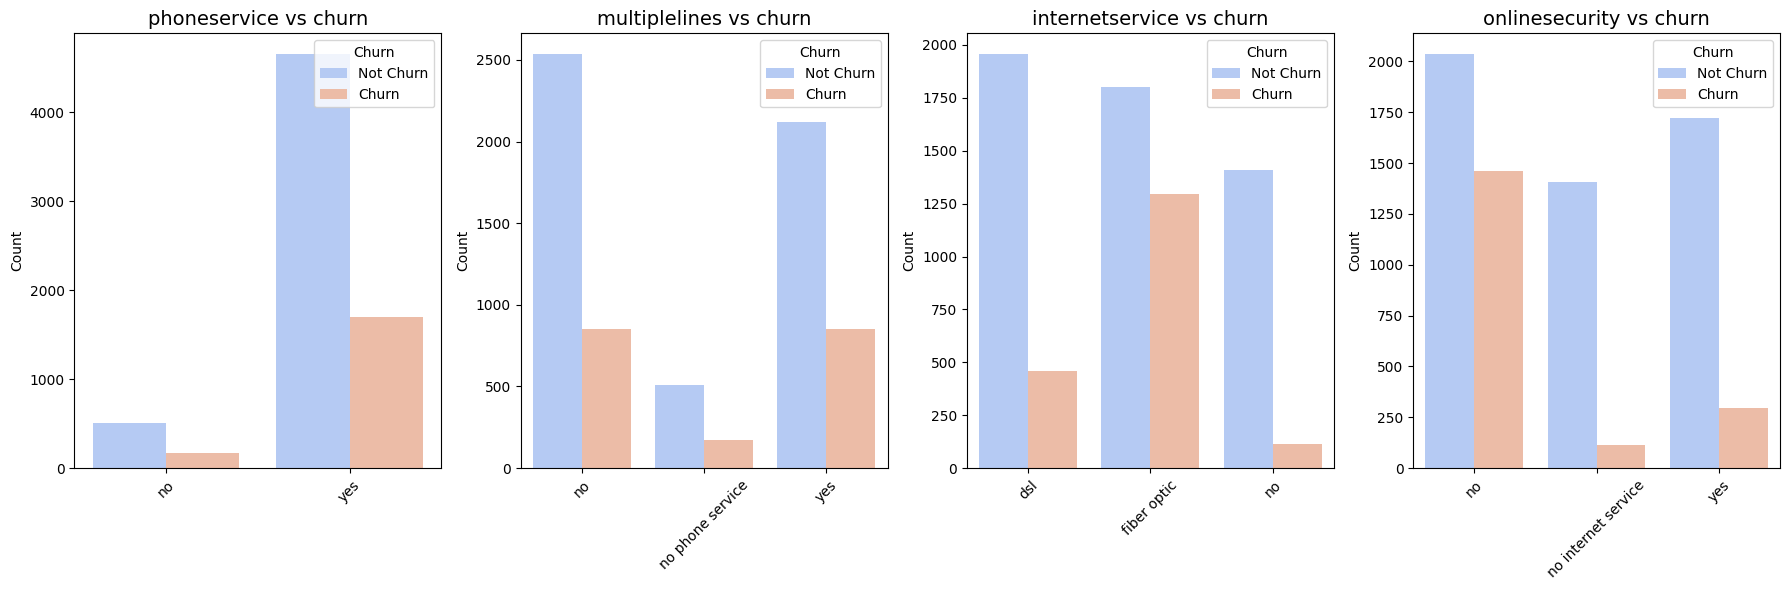

In [85]:
bivariate_analysis_barchart(eda_df, churn_col='churn', categorical_columns=categorical_columns[4:8])

**Insights**:
* `phoneservice` -> Ketika berfokus pada pelanggan yang churn saja, terlihat bahwa pelanggan yang berlangganan pada layanan phoneservice lebih banyak memiliki kecenderungan untuk churn dibandingkan pelanggan yang tidak berlangganan. Hal ini bisa menjadi indikator akan adanya ketidakpuasan akan layanan phoneservice yang diberikan.
* `multiplelines` -> Pada multiplelines pelanggan yang hanya berlangganan pada satu saluran dan berlangganan dengan multiplelines memiliki jumlah churn yang sama. Ini bisa menjadi indikasi bahwa adanya ketidakpuasan akan layanan yang diberikan.
* `internetservice` -> Jumlah pelanggan churn di kelompok fiber optic telah melebihi 50% dari jumlah pelanggan yang tidak churn di kelompok tersebut, hal ini bisa mengindikasikan ada yang salah sehingga mempengaruhi kepuasan customer dan perlu dioptimalisasi. 
* `onlinesecurity` -> Pada layanan add-on atau tambahan ini, jumlah pelanggan churn pada kelompok tidak berlangganan telah melebihi 50% dari pelanggan yang tidak churn di kelompok ini. Hal ini mengindikasikan jika pelanggan tidak berlangganan pada layanan tambahan maka memiliki tendensi untuk churn.

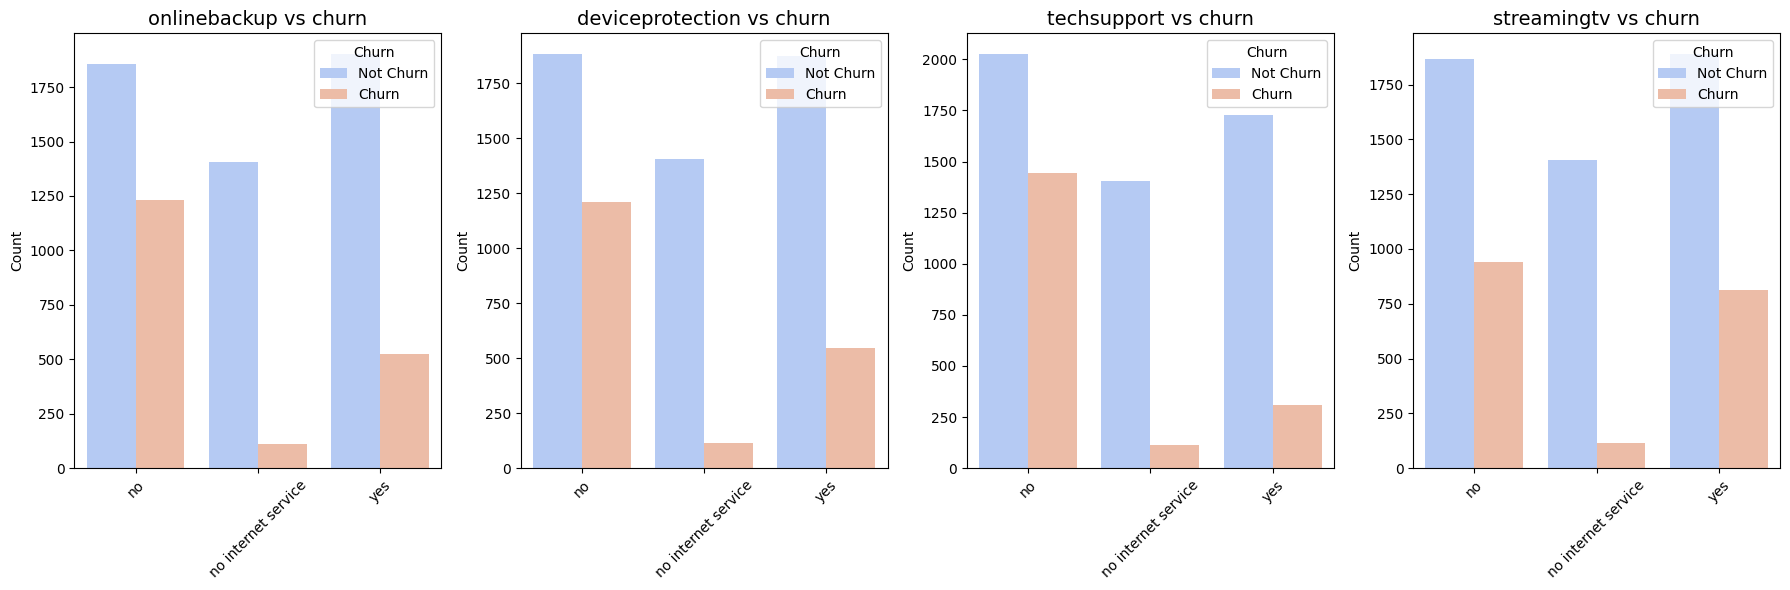

In [86]:
bivariate_analysis_barchart(eda_df, churn_col='churn', categorical_columns=categorical_columns[8:12])

**Insights**:
* `onlinebackup`, `deviceprotection`, `techsupport` -> Jumlah pelanggan yang churn pada kelompok tidak berlangganan atau `no` lebih banyak dan melebihi 50% dari pelanggan yang tidak churn di kelompok ini, ini mengindikasikan jika pelanggan tidak berlangganan pada layanan tambahan yang tertera maka memiliki kecenderungan churn lebih tinggi.
* `streamingtv` -> Pelanggan yang churn di kelompok tidak berlangganan dan berlangganan layanan ini jumlahnya mirip atau perbedaan antar pelanggan yang churn di kelompok `no` dan `yes` tidak signifikan.

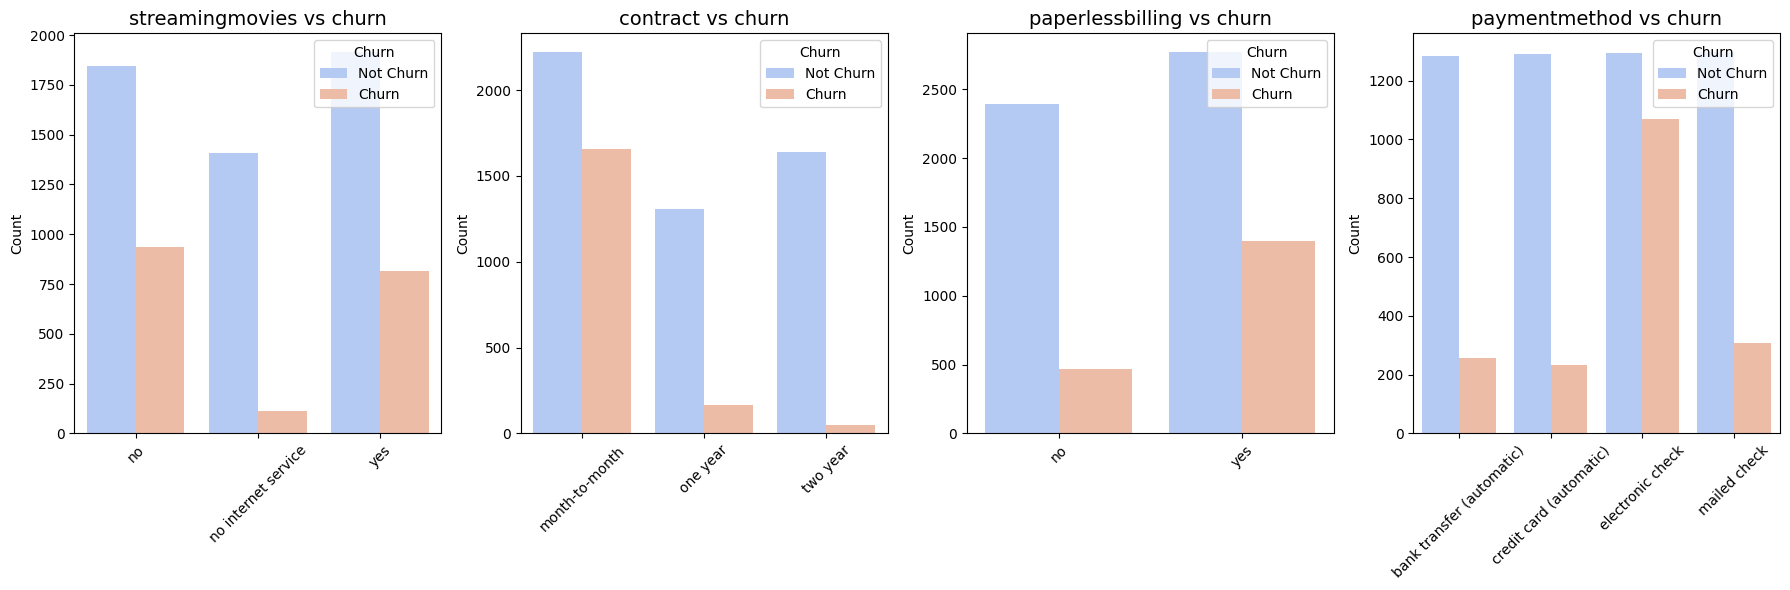

In [87]:
bivariate_analysis_barchart(eda_df, churn_col='churn', categorical_columns=categorical_columns[12:])

**Insights**:
* `streamingmovies` -> Pada kelompok tidak berlangganan atau `no` terlihat bahwa churn jumlahnya memenuhi 50% dari pelanggan yang tidak churn. Kemudian, pada kelompok `yes` pelanggan memiliki kecenderungan churn yang cukup tinggi juga. Ini mengindikasikan adanya ketidakpuasan atas layanan yang diberikan.
* `contract` -> Pelanggan pada kelompok `month-to-month` memiliki kecenderungan yang lebih tinggi untuk churn dan itu ditunjukkan dengan bar chart yang jumlahnya melebihi 50% dari jumlah pelanggan yang tidak churn.
* `paperlessbilling` -> Pelanggan pada kelompok `yes` memiliki kecenderungan churn jauh lebih banyak daripada kelompok `no`, ini bisa menjadi indikator adanya ketidakpuasan pelanggan atas layanan yang diberikan.
* `paymentmethod` -> Terlihat pelanggan yang churn mendominasi kelompok `electornic check` yang mengindikasikan adanya ketidakpuasan layanan pembayaran dengan metode ini.

In [70]:
def boxplot_churn(df, numerical_columns, churn_col: str):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for i, col in enumerate(numerical_columns[:3]):  # Limit to 3 numerical columns
        sns.boxplot(data=df, x=churn_col, y=col, palette='coolwarm', ax=axes[i])
        axes[i].set_title(f'{col} distribution by {churn_col}', fontsize=14)
        axes[i].set_ylabel(col)
        axes[i].set_xlabel('')
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(['Not Churn', 'Churn'])
    plt.tight_layout()
    plt.show()

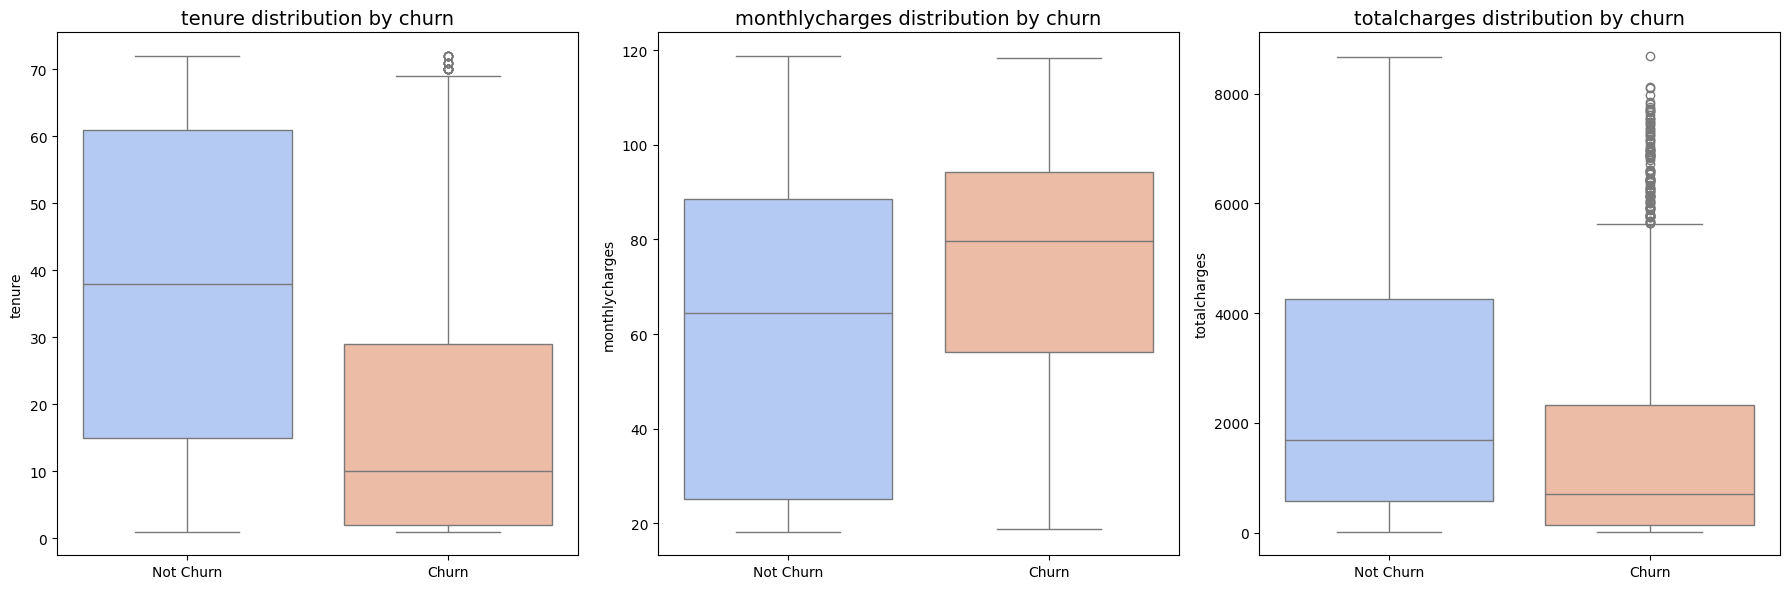

In [71]:
boxplot_churn(eda_df, numerical_columns, churn_col='churn')

**Insights**:
* `tenure`:
     * Pada kelompok pelanggan yang tidak churn terdapat dari range 0 hingga 70 bulan dan rata-rata berlangganan sekitar 37 bulan.
     * Pada kelompok pelanggan yang churn terdapat dari range 0 hingga 68 bulan dan nilai di atas ini sudah dianggap outlier atau pencilan. Rata-rata pelanggan yang churn berlangganan kira-kira 9 bulan.
* `monthlycharges`:
     * Pada kelompok tidak churn rata-rata pelanggan memiliki tagihan bulanan sekitar `$63`.
     * Pada kelompok pelanggan yang churn, rata-rata tagihan bulanannya adalah `$80`.
* `totalcharges`:
     * Di kelompok tidak churn rata-rata pelanggan memiliki tagihan sekitar `$1700`.
     * Di kelompok churn rata-rata tagihan pelanggan sekitar `$600`.

#### **Multivariate Analysis**:

melakukan encoding pada data kategorikal agar bisa dijadikan heatmap dan dilihat korelasinya.

In [220]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_columns:
    le = LabelEncoder()
    eda_df[col] = le.fit_transform(eda_df[col])

In [225]:
def generate_correlation_heatmap(df: pd.DataFrame):
    """Generates and displays a correlation heatmap for the dataframe."""
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

def generate_pairplot(numerical_columns):
    """Generates and displays a pair plot for the dataframe."""
    
    numerical_df = df[numerical_columns] 
    sns.pairplot(numerical_df)
    plt.suptitle("Pair Plot of Features", y=1.02)
    plt.show()

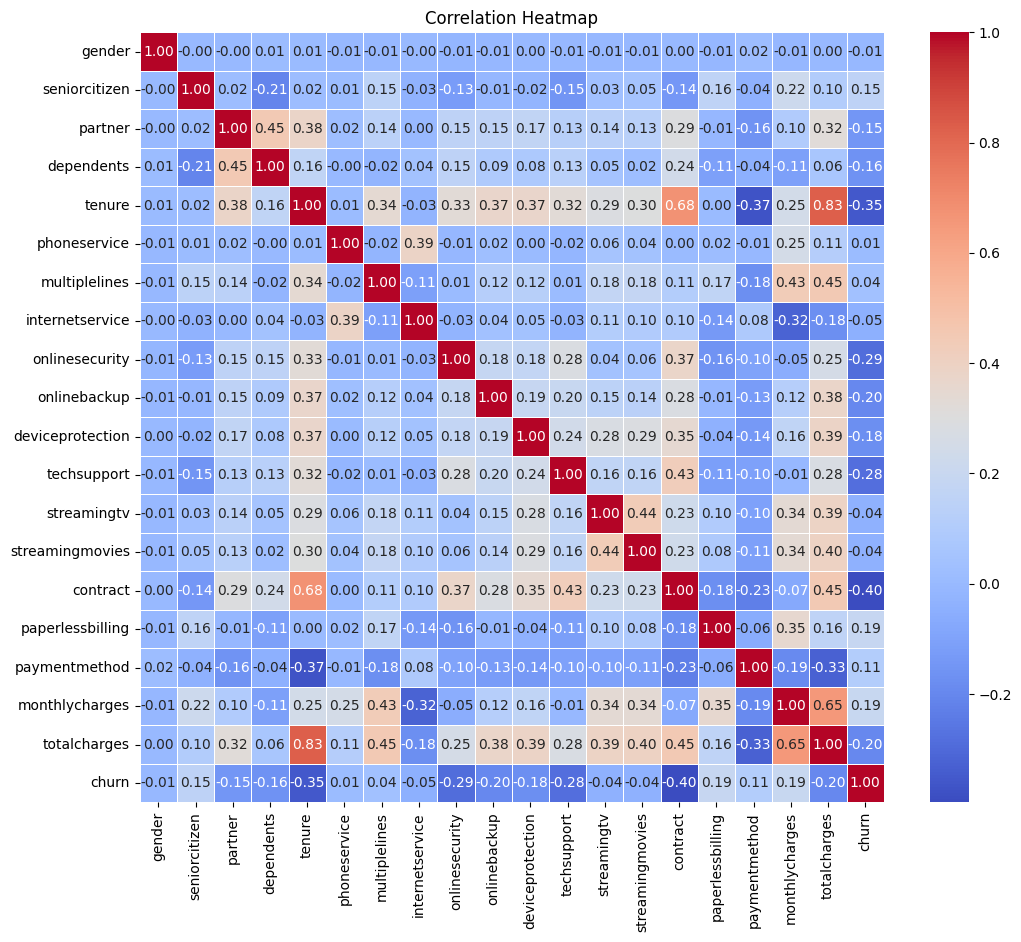

In [226]:
generate_correlation_heatmap(eda_df)

* Korelasi tenure (-0.35) dengan churn menggambarkan hubungan langsung, di mana pelanggan lama lebih kecil kemungkinan untuk churn.
* Pelanggan dengan tenure lebih lama (misalnya 20-70 bulan) cenderung tidak churn (churn = No).

membuat pairplot berdasarkan data numerik:

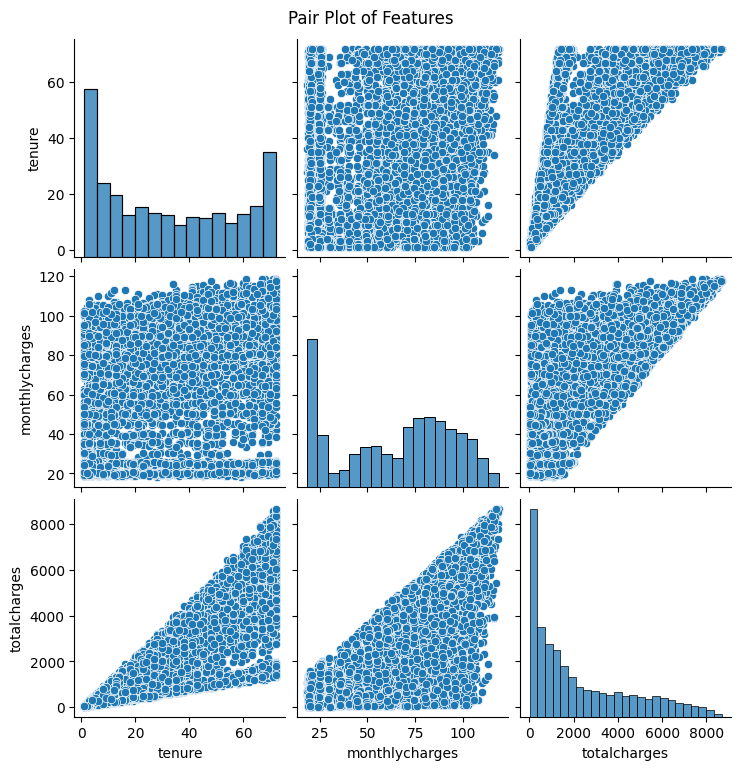

In [43]:
generate_pairplot(numerical_columns)

**Insights**:
* Terdapat pola atau trend linear antara `tenure` dengan `totalcharges` dan `monthlycharges` dengan `totalcharges` yang menandakan korelasi positif atau ketika tenure meningkat maka totalcharges juga akan ikut meningkat, begitu pula dengan hubungan antara monthlycharges dan totalcharges.
* Pola data yang membentuk segitiga di bawah atau di atas garis linear disebabkan oleh distribusi data yang tidak normal dan tingkat variasi data yang tinggi. Variasi ini membuat data tampak menyebar dalam pola yang menyerupai segitiga di scatter plot.

# **Data Preparation**

#### **Feature Selection**

Dataset memiliki 19 features dan memungkinkan bahwa kolom-kolom memiliki nilai atau noise yang tidak diperlukan sehingga akan mempengaruhi output model nantinya. Feature selection dilakukan untuk memilih features yang relevan dan sangat berkaitan dengan target atau customer churn. Uji independensi chi-square, digunakan untuk menguji apakah dua variabel kategori (feature dan target) berhubungan satu sama lain.

In [90]:
# import libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [185]:
# encoding data kategorik
df_categoric = df[categorical_columns].copy()

for col in categorical_columns:
    le = LabelEncoder()
    df_categoric[col] = le.fit_transform(df_categoric[col])

In [186]:
# menentukan features dan target
X = df_categoric.iloc[:, :-1]
y = df_categoric.iloc[:, -1]

In [187]:
# menerapkan class SelectKBest dengan chi2 untuk mengekstrak top 10 features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)

In [188]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [189]:
# menggabungkan 2 dataframe untuk visualisasi
featureScores = pd.concat([dfscores, dfcolumns], axis=1)
featureScores.columns = ['Score', 'Feature']

In [191]:
print(featureScores.nlargest(10, 'Score'))

          Score           Feature
13  1111.759054          contract
7    550.437364    onlinesecurity
10   522.164716       techsupport
8    229.441123      onlinebackup
9    190.688004  deviceprotection
1    133.482766     seniorcitizen
3    131.271509        dependents
14   104.979224  paperlessbilling
2     81.857769           partner
15    59.240507     paymentmethod


**Conclusion**: 10 features yang berasal dari hasil uji chi-square inilah yang digunakan untuk proses modeling.

ANOVA F-value digunakan untuk mengetahui hubungan antara variabel numerik (feature) dengan variabel kategorik (target).

In [158]:
from sklearn.feature_selection import SelectKBest, f_classif

In [160]:
df_numeric = df[numerical_columns].copy()

In [162]:
# membuat features dan target
X = df_numeric.iloc[:, :]
y = df_categoric.iloc[:, -1]

In [165]:
# menerapkan anova untuk mengekstrak top 3 features
bestfeatures = SelectKBest(score_func=f_classif, k=3)
fit = bestfeatures.fit(X, y)

In [168]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [169]:
# menggabungkan 2 dataframe untuk visualisasi
featureScores = pd.concat([dfscores, dfcolumns], axis=1)
featureScores.columns = ['Score', 'Feature']

In [170]:
print(featureScores.nlargest(3, 'Score'))

         Score         Feature
0  1007.509431          tenure
2   291.344862    totalcharges
1   271.576990  monthlycharges


**Conclusion**: Semua data numerik atau fitur yang dianalisis menunjukkan relevansi yang signifikan. Di antara fitur-fitur tersebut, tenure berada di peringkat teratas, menandakan bahwa fitur ini memiliki pengaruh paling besar dan sangat berkaitan berdasarkan hasil analisis ANOVA.

#### **Feature Scaling**

Dari hasil univariate analyis sebelumnya terlihat bahwa data numerik tidak ada yang berdistribusi normal dengan skala yang berbeda-beda:
* `tenure` -> min: 1; max: 72
* `monthlycharges` -> min: 18.25; max: 118.75
* `totalcharges` -> min: 18.8; max: 8684.8


maka untuk mencegah terjadinya kesalahan dalam model terutama karena skala yang tidak sama maka digunakanlah **MinMaxScaler**.

In [174]:
from sklearn.preprocessing import MinMaxScaler

Drop kolom yang tidak terpilih saat feature selection agar tidak mempengaruhi proses modeling.

In [192]:
columns_to_drop = ['multiplelines', 'internetservice', 'streamingmovies', 'streamingtv', 'gender', 'phoneservice']

In [193]:
df = pd.concat([df_categoric, df_numeric], axis=1)
df.drop(columns = columns_to_drop, inplace = True)

In [198]:
normalization = MinMaxScaler()
df['tenure'] = normalization.fit_transform(df[['tenure']])
df['monthlycharges'] = normalization.fit_transform(df[['monthlycharges']])
df['totalcharges'] = normalization.fit_transform(df[['totalcharges']])

#### **Train Test Split**

# **Modeling**

In [ ]:
# XGBoost

# **Evaluation**